In [1]:
import re, os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="ticks")
sns.set_style({"xtick.direction": "in","ytick.direction": "in","xtick.top":True,"ytick.right":True,"axes.grid":True})
%matplotlib inline

def read_file(filename):
    lines = []
    with open (filename, "r") as myfile:
        lines = [line.rstrip('\n') for line in myfile]
    return lines

def calcul_fair(values):
    '''
    @brief:
        calculate fairness
    @params:
        values: a list of values
    '''
    values = np.array(values)
    n = len(values)
    if sum(values) != 0.:
        return pow(sum(values), 2)/(n*sum(pow(values, 2)))
    else:
        return 1.


def smooth(y, box_pts):
    box = np.ones(box_pts)/box_pts
    y_smooth = np.convolve(y, box, mode='same')
    return y_smooth

In [2]:
n_lb=1
n_as=8


experience = "reward-test/{}lb-{}as".format(n_lb, n_as)
rewards = [
    'jain2',
    # 'product',
    'var',
    'var_exp',
    # 'var_plus_exp',
    # 'var_plus_log',
    # 'std_plus_log',
    # 'var_log',
    'max',
    'max_exp',
    'max_log',
    'var_2_norm',
    'cv',
    ]
rate = 0.9
method = 'rlb-sac'

In [3]:
result1 = {}
result2 = {}
result3 = {}
result4 = {}

for reward in rewards:
    exp = experience + '-reward-{}'.format(reward)
    dirname = os.path.join("../data/simulation", exp, method, "rate{:.3f}".format(rate), "")
    filename = os.path.join(dirname, 'test.log')
    print(filename)
    try:
        all_lines = [l for l in read_file(filename)]
    except:
        all_lines = []
    #start_idx = [i for i, l in enumerate(all_lines) if 'ready' in l]
    start_idx = [1]
    end_idx = [i for i, l in enumerate(all_lines) if 'end of episode' in l]
    start_idx += end_idx[:-1]
    if len(start_idx) != len(end_idx):
        end_idx.append(len(all_lines)-1)
    n_ep = len(start_idx)

    fair_list = []
    t_rest_total_list = []
    qlen_total_list=[]
    reward_list=[]

    for ep in range(n_ep):
        fair_list_ = []
        t_rest_total_list_ = []
        qlen_total_list_=[]
        lines = [l for l in all_lines[start_idx[ep]:end_idx[ep]] if 'Periodic' in l]
        #print(len(lines))
        for l in lines:
            t_rest_list_ = [float(s.split(' ')[-1]) for s in l.split('|')]
            fair_list_.append(calcul_fair(t_rest_list_))
            t_rest_total_list_.append(sum(t_rest_list_))
        lines = [l.split(':')[-1] for l in all_lines[start_idx[ep]:end_idx[ep]] if 'Actual On Flow' in l]
        for l in lines:
            qlen_list = [int(s) for s in l.split('|')]
            qlen_total_list_.append(sum(qlen_list))
            
        reward_list+= [float(l.split(' ')[-1]) for l in all_lines[start_idx[ep]:end_idx[ep]] if 'Reward' in l]
        fair_list+=fair_list_
        t_rest_total_list+=t_rest_total_list_
        qlen_total_list+=qlen_total_list_


        result1[reward] = fair_list
        result2[reward] = t_rest_total_list
        result3[reward] = qlen_total_list
        result4[reward] = reward_list

../data/simulation/reward-test/1lb-8as-reward-jain2/rlb-sac/rate0.900/test.log
../data/simulation/reward-test/1lb-8as-reward-var/rlb-sac/rate0.900/test.log
../data/simulation/reward-test/1lb-8as-reward-var_exp/rlb-sac/rate0.900/test.log
../data/simulation/reward-test/1lb-8as-reward-max/rlb-sac/rate0.900/test.log
../data/simulation/reward-test/1lb-8as-reward-max_exp/rlb-sac/rate0.900/test.log
../data/simulation/reward-test/1lb-8as-reward-max_log/rlb-sac/rate0.900/test.log
../data/simulation/reward-test/1lb-8as-reward-var_2_norm/rlb-sac/rate0.900/test.log
../data/simulation/reward-test/1lb-8as-reward-cv/rlb-sac/rate0.900/test.log


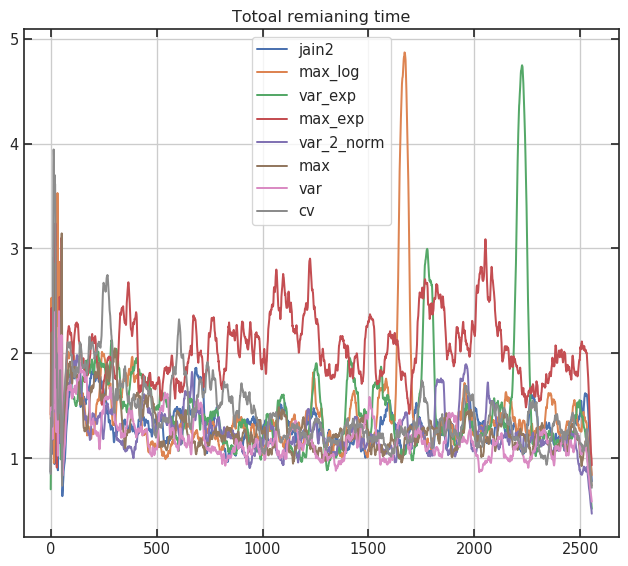

In [5]:
fig = plt.figure(figsize=(8, 7), dpi=96)
for reward, values in result2.items():
    if len(values) == 0: continue
    plt.plot(list(smooth(values[:55], 5)) + list(smooth(values[:2500], 50)), label = reward)  
    #plt.ylim(-0.6, 0)
    plt.legend()
plt.title('Totoal remaining time'.format( reward))
plt.show()